(chapter3_part3)=

# Gradient Descent

- This is a supplement material for the [Machine Learning Simplified](https://themlsbook.com) book. It sheds light on Python implementations of the topics discussed while all detailed explanations can be found in the book. 
- I also assume you know Python syntax and how it works. If you don't, I highly recommend you to take a break and get introduced to the language before going forward with my code. 
- This material can be downloaded as a Jupyter notebook (Download button in the upper-right corner -> `.ipynb`) to reproduce the code and play around with it. 

In the [previous section](https://code.themlsbook.com/book/chapter3/cost_function) we explored how to build a cost function in python. In this section, we will go further and explore each step of the gradient descent algorithm.

As a reminer, I'm leaving here our hypothetical dataset (Table 3.1) of six apartments located in the center of Amsterdam along with their prices (in 10,000 EUR) and floor areas (in square meters).

| area ($m^2$) | price (in €10,000) |
| ----------- | ----------- |
| 30 | 31 | 
| 46 | 30 |
| 60 | 80 |
| 65 | 49 |
| 77 | 70 |
| 95 | 118 |



## 1. Required Libraries & Data

Before we start, we need to import few libraries that we will use in this jupyterbook.

In [1]:
import sympy as sym #to take derivatives of functions
import matplotlib.pyplot as plt #to build graphs
import numpy as np #to work with numbers
%config InlineBackend.figure_format = 'retina' #to make sharper and prettier plots

Next step is to re-create our hypothetical dataset that we've been working with.

In [2]:
x = np.array([[30], [46], [60], [65], [77], [95]])
y = np.array([31, 30, 80, 49, 70, 118])

## 2. Gradient Descent in Action

Let's now see the gradient descent is action. But before we go into that, I'd like to recall how the fitted regression looks like - in other words, what regression the gradient needs to obtain in the end of its procedures. 

In previous sections we understood that the function of the fitted regression is $f(x) = -18 + 1.3*x$, let's go ahead and plot this function using `matplotlib` library.

(0.0, 110.0)

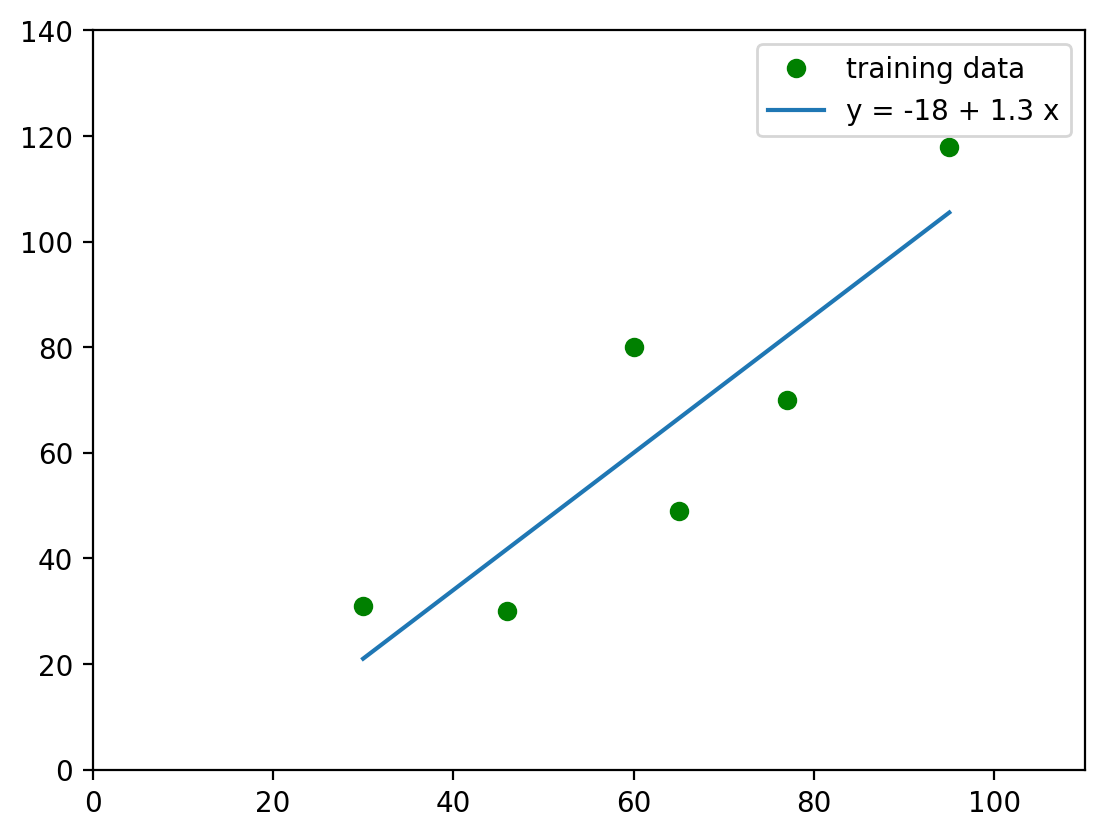

In [3]:
fig, ax = plt.subplots()

#plotting training dataset
ax.plot(x,y, 'o', color='g', label='training data')

#plotting the fitted regression
ax.plot(x, -18 + 1.3*x, label='y = {} + {} x'.format(-18, 1.3))

#showing legend and setting the size of the graph
plt.legend();
plt.ylim(0, 140)
plt.xlim(0, 110)

Ok, so the gradient descent needs to obtain identical regression as the one shown above. Visual representation is a nice thing, but we can also quantify the goodness of fit of this regression. Let's calculate its Sum of Squared Residuals, or SSR, once again. 

> If you need a more detailed overview of how SSR is calculated, go to a [previous section](https://code.themlsbook.com/book/chapter3/cost_function).

In [4]:
#preparing empty list for predicted values
y_pred = []

#simple loop to calculate each value predicted by the function, y_pred
for i in x:
    y_pred.append(-18 + 1.3*i)

print(y_pred)

[array([21.]), array([41.8]), array([60.]), array([66.5]), array([82.1]), array([105.5])]


In [5]:
#preparing empty list for residuals
r = []

#simple loop to calculate each redisual, r
for i in range(0, len(x)):
    r.append((y[i]-y_pred[i])**2)
print(r)

[array([100.]), array([139.24]), array([400.]), array([306.25]), array([146.41]), array([156.25])]


In [6]:
#sum all the residuals 
ssr = np.sum(r)
print(ssr)

1248.1500000000003


### 2.1. Deriving Cost Function

From previous sections we already know our cost function $J(a)$:

$
\begin{equation}
\begin{split}
    J(a) &= \sum\Big(y_i - (ax_i-18)\Big)^2 \\
    &= \Big(31-(a*30-18)\Big)^2+\Big(30-(a*46-18)\Big)^2+\Big(80-(a*60-18)\Big)^2+\\
    &+\Big(49-(a*65-18)\Big)^2+\Big(70-(a*77-18)\Big)^2+\Big(118-(a*95-18)\Big)^2
\end{split}
\end{equation}
$

Let's now take the derivative of this function with the respect to parameter $a$. In python, you can simply derive any function using a special library `sympy` that we've already installed in the begining of this notebook.

In [7]:
# Calculating a derivative
a = sym.Symbol('a')
f = (31-(a*30-18))**2+(30-(a*46-18))**2+(80-(a*60-18))**2+(49-(a*65-18))**2+(70-(a*77-18))**2+(118-(a*95-18))**2
sym.diff(f)

51590*a - 67218

<!-- 


$
\begin{equation}
\begin{split}
    \underbrace{\frac{\partial}{\partial \ a} \ J(a)}_\text{slope} &=\underbrace{\frac{\partial}{\partial \ a}\Big(31-(a*30-18)\Big)^2}_\text{2*30*(31-(a*30-18))*(-1)}+\frac{\partial}{\partial \ a}\Big(30-(a*46-18)\Big)^2+\frac{\partial}{\partial \ a}\Big(80-(a*60-18)\Big)^2+\\
    &+\frac{\partial}{\partial \ a}\Big(49-(a*65-18)\Big)^2+\frac{\partial}{\partial \ a}\Big(70-(a*77-18)\Big)^2+\frac{\partial}{\partial \ a}\Big(118-(a*95-18)\Big)^2
\end{split}
\end{equation}
$

Using a chain rule for each term, we will get this equation: 

$
\begin{equation}
\begin{split}
    \frac{\partial}{\partial \ a} \ J(a) &=(-2*30)\Big(31-(a*30-18)\Big)+(-2*46)\Big(30-(a*46-18)\Big)+(-2*60)\Big(80-(a*60-18)\Big)+\\
    &+(-2*65)\Big(49-(a*65-18)\Big)+(-2*77)\Big(70-(a*77-18)\Big)+(-2*95)\Big(118-(a*95-18)\Big)
\end{split}
\end{equation}
$
 -->


Now that we have the derivative, gradient descent will use it to find where the Sum of Squared Residuals is the lowest. 


### 2.2. Gradient Descent Steps

Because the gradient descent does not know the true value of $a$ that would minimize $J(a)$ (which is $a=1.3$), it will start by setting $a=0$.

#### 2.2.1. Step 1 

First step is to plug $a=0$ into the derivative:

In [8]:
a = 0
d = 51590*a-67218

print('Derivative = ', d)

Derivative =  -67218


Thus, when $a=0$, the slope of the curve = -67218 (which is identical to what we've received in the [Machine Learning Simplified](themlsbook.com) book).

Gradient descent use step size to get to the minimum point. Gradient descent determines the **Step Size** by multiplying the slope $a$ by a small number called the learning rate $l$.

Just like in the Machine Learning Simplified book, let's take $l=0.00001$ and calculate the Step Size:

$
\begin{equation}
    \begin{split}
        Step \ Size &= J(a) * l \\
        &=(-67218)*0.00001
    \end{split}
\end{equation}
$

In [9]:
#setting the learning rate
l = 0.00001

#calculating step size
step_size = d*l

print('Step Size = ', step_size)

Step Size =  -0.67218


And then we update $a$: 
$
\begin{equation}
    \begin{split}
        a_{new} &= a - Step \ Size \\
        &=0-(-0.67218)=0.67218
    \end{split}
\end{equation}
$

In [10]:
a1 = a-step_size
print('At Step 1, a = ', a)

At Step 1, a =  0


The first iteration is done. Let's move forward.

#### 2.2.2. Step 2

Following the same logic, we now use the new coefficient $a$ to calculate new  derivative:

In [11]:
d = 51590*a1-67218
print('Derivative = ', round(d, 4))

Derivative =  -32540.2338


In [12]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.3254


In [13]:
a2 = a1-step_size
print('At Step 2, a = ', round(a2, 5))

At Step 2, a =  0.99758


#### 2.2.3. Step 3

In [14]:
d = 51590*a2-67218
print('Derivative = ', round(d, 4))

Derivative =  -15752.7272


In [15]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.15753


In [16]:
a3 = a2-step_size
print('At Step 3, a = ', round(a3, 5))

At Step 3, a =  1.15511


#### 2.2.4. Step 4

In [17]:
d = 51590*a3-67218
print('Derivative = ', round(d, 4))

Derivative =  -7625.8952


In [18]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.07626


In [19]:
a4 = a3-step_size
print('At Step 4, a = ', round(a4, 5))

At Step 4, a =  1.23137


#### 2.2.5. Step 5

In [20]:
d = 51590*a4-67218
print('Derivative = ', round(d, 4))

Derivative =  -3691.6959


In [21]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.03692


In [22]:
a5 = a4-step_size
print('At Step 5, a = ', round(a5, 5))

At Step 5, a =  1.26829


#### 2.2.6. Step 6

In [23]:
d = 51590*a5-67218
print('Derivative = ', round(d, 4))

Derivative =  -1787.15


In [24]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.01787


In [25]:
a6 = a5-step_size
print('At Step 6, a = ', round(a6, 5))

At Step 6, a =  1.28616


#### 2.2.7. Step 7

In [26]:
d = 51590*a6-67218
print('Derivative = ', round(d, 4))

Derivative =  -865.1593


In [27]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.00865


In [28]:
a7 = a6-step_size
print('At Step 7, a = ', round(a7, 5))

At Step 7, a =  1.29481


#### 2.2.8. Step 8

In [29]:
d = 51590*a7-67218
print('Derivative = ', round(d, 4))

Derivative =  -418.8236


In [30]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.00419


In [31]:
a8 = a7-step_size
print('At Step 8, a = ', round(a8, 5))

At Step 8, a =  1.299


#### 2.2.9. Step 9

In [32]:
d = 51590*a8-67218
print('Derivative = ', round(d, 4))

Derivative =  -202.7525


In [33]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.00203


In [34]:
a9 = a8-step_size
print('At Step 9, a = ', round(a9, 5))

At Step 9, a =  1.30102


#### 2.2.10. Step 10

In [35]:
d = 51590*a9-67218
print('Derivative = ', round(d, 4))

Derivative =  -98.1525


In [36]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.00098


In [37]:
a10 = a9-step_size
print('At Step 10, a = ', round(a10, 5))

At Step 10, a =  1.30201


#### 2.2.11. Step 11

In [38]:
d = 51590*a10-67218
print('Derivative = ', round(d, 4))

Derivative =  -47.5156


In [39]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.00048


In [40]:
a11 = a10-step_size
print('At Step 11, a = ', round(a11, 5))

At Step 11, a =  1.30248


#### 2.2.12. Step 12

In [41]:
d = 51590*a11-67218
print('Derivative = ', round(d, 4))

Derivative =  -23.0023


In [42]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.00023


In [43]:
a12 = a11-step_size
print('At Step 12, a = ', round(a12, 5))

At Step 12, a =  1.30271


#### 2.2.13. Step 13

In [44]:
d = 51590*a12-67218
print('Derivative = ', round(d, 4))

Derivative =  -11.1354


In [45]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.00011


In [46]:
a13 = a12-step_size
print('At Step 13, a = ', round(a13, 5))

At Step 13, a =  1.30282


#### 2.2.14. Step 14

In [47]:
d = 51590*a13-67218
print('Derivative = ', round(d, 4))

Derivative =  -5.3907


In [48]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -5e-05


In [49]:
a14 = a13-step_size
print('At Step 14, a = ', round(a14, 5))

At Step 14, a =  1.30288


#### 2.2.15. Step 15

In [50]:
d = 51590*a14-67218
print('Derivative = ', round(d, 4))

Derivative =  -2.6096


In [51]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -3e-05


In [52]:
a15 = a14-step_size
print('At Step 15, a = ', round(a15, 5))

At Step 15, a =  1.3029


Eventually, the gradient descent obtained the proper value for the parameter $a =  1.3029$. 

### 2.3. Different Initialization

The gradient succeeded at finding the proper value for $a$. Let's now see what will happen if the gradient starts at a different value for $a$, not $a=0$. For instance, let's take a random value of $a=2.23$.

In [53]:
l = 0.00001 #same learning rate
a = 2.23 #different value for a

#### 2.3.1. Step 1

In [54]:
d = 51590*a-67218
print('Derivative = ', d)

Derivative =  47827.7


In [55]:
step_size = d*l
print('Step Size = ', step_size)

Step Size =  0.478277


In [56]:
a1 = a-step_size
print('At Step 1, a = ', round(a1, 5))

At Step 1, a =  1.75172


#### 2.3.2. Step 2

In [57]:
#step 2

d = 51590*a1-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a2 = a1-step_size
print('At Step 2, a = ', round(a2, 5))

Derivative =  23153.3896
Step Size =  0.23153
At Step 2, a =  1.52019


#### 2.3.3. Step 3

In [58]:
#step 3

d = 51590*a2-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a3 = a2-step_size
print('At Step 3, a = ', round(a3, 5))

Derivative =  11208.5559
Step Size =  0.11209
At Step 3, a =  1.4081


#### 2.3.4. Step 4

In [59]:
#step 4

d = 51590*a3-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a4 = a3-step_size
print('At Step 4, a = ', round(a4, 5))

Derivative =  5426.0619
Step Size =  0.05426
At Step 4, a =  1.35384


#### 2.3.5. Step 5

In [60]:
#step 5

d = 51590*a4-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a5 = a4-step_size
print('At Step 5, a = ', round(a5, 5))

Derivative =  2626.7566
Step Size =  0.02627
At Step 5, a =  1.32758


#### 2.3.6. Step 6

In [61]:
#step 6

d = 51590*a5-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a6 = a5-step_size
print('At Step 6, a = ', round(a6, 5))

Derivative =  1271.6129
Step Size =  0.01272
At Step 6, a =  1.31486


#### 2.3.7. Step 7

In [62]:
#step 7

d = 51590*a6-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a7 = a6-step_size
print('At Step 7, a = ', round(a7, 5))

Derivative =  615.5878
Step Size =  0.00616
At Step 7, a =  1.3087


#### 2.3.8. Step 8

In [63]:
#step 8

d = 51590*a7-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a8 = a7-step_size
print('At Step 8, a = ', round(a8, 5))

Derivative =  298.006
Step Size =  0.00298
At Step 8, a =  1.30572


#### 2.3.9. Step 9

In [64]:
#step 9

d = 51590*a8-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a9 = a8-step_size
print('At Step 9, a = ', round(a9, 5))

Derivative =  144.2647
Step Size =  0.00144
At Step 9, a =  1.30428


#### 2.3.10. Step 10 - Step 15

In [65]:
#step 10

d = 51590*a9-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a10 = a9-step_size
print('At Step 10, a = ', round(a10, 5))

Derivative =  69.8386
Step Size =  0.0007
At Step 10, a =  1.30358


In [66]:
#step 11

d = 51590*a10-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a11 = a10-step_size
print('At Step 10, a = ', round(a11, 5))

Derivative =  33.8088
Step Size =  0.00034
At Step 10, a =  1.30324


In [67]:
#step 12

d = 51590*a11-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a12 = a11-step_size
print('At Step 10, a = ', round(a12, 5))

Derivative =  16.3669
Step Size =  0.00016
At Step 10, a =  1.30308


In [68]:
#step 13

d = 51590*a12-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a13 = a12-step_size
print('At Step 10, a = ', round(a13, 5))

Derivative =  7.9232
Step Size =  8e-05
At Step 10, a =  1.303


In [69]:
#step 14

d = 51590*a13-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a14 = a13-step_size
print('At Step 10, a = ', round(a14, 5))

Derivative =  3.8356
Step Size =  4e-05
At Step 10, a =  1.30296


In [70]:
#step 15

d = 51590*a14-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a15 = a14-step_size
print('At Step 10, a = ', round(a15, 5))

Derivative =  1.8568
Step Size =  2e-05
At Step 10, a =  1.30294


The gradient descent successfully obtained the same proper value for the parameter $a$, even though it was initialized with the different value for $a$ in the beginning.